In [ ]:
#https://pypi.org/project/grad-cam/1.2.3/

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import argparse
import numpy as np
import os
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import sys

C:\Users\kcs163\Anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#sys.path.append('./pytorch-grad-cam-master')

In [2]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
os.getcwd()

'C:\\Users\\kcs163\\works\\git_repos\\ADL-MAE\\practise\\final'

In [6]:
class Args:
    model = 'vit_base_patch16'
    weight_decay = 0
    lr = None
    resume = '../tmp/checkpoint/checkpoint-100_1blk.pth'
    eval = True
    data_path = '../mae-main/dataset/imagenette2-320/'
args = Args()

In [8]:
transform_val = transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.2, 1.0), interpolation=3),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
dataset_val = datasets.ImageFolder(os.path.join(args.data_path, 'val'), transform=transform_val)
data_loader_val = torch.utils.data.DataLoader( dataset_val, batch_size=1, num_workers=0, drop_last=False)

C:\Users\kcs163\Anaconda3\envs\ml\lib\site-packages\torchvision\transforms\transforms.py:891: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [12]:
invT = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ]),])

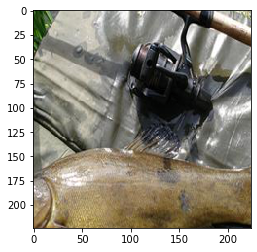

In [13]:
i = 0
img = invTrans(dataset_val[i][0]).permute(1,2,0)
plt.imshow(img, interpolation='nearest')

In [13]:
#plt.imshow(visualization, interpolation='nearest')

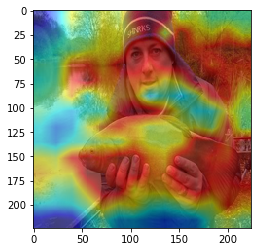

In [15]:
i = 3
img0 = dataset_val[i][0]
img = img0.permute(1,2,0)
grayscale_cam = cam(input_tensor=img0[None,:])
visualization = show_cam_on_image(img.numpy(), grayscale_cam.squeeze())
plt.imshow(visualization, interpolation='nearest')

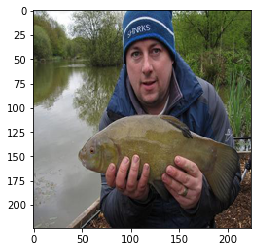

In [16]:
plt.imshow(img, interpolation='nearest')

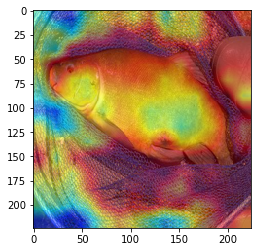

In [17]:
i = 5
img0 = dataset_val[i][0]
img = img0.permute(1,2,0)
grayscale_cam = cam(input_tensor=img0[None,:])
visualization = show_cam_on_image(img.numpy(), grayscale_cam.squeeze())
plt.imshow(visualization, interpolation='nearest')

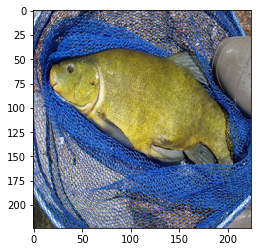

In [18]:
plt.imshow(img, interpolation='nearest')